In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [48]:
pbmc = pd.read_csv("pbmc_polya.csv")
skin = pd.read_csv("skin_polya.csv")


In [49]:
pbmc_u = pbmc.pivot(index='Sample', columns='Stat', values='Value')[["Assigned","Unassigned_Ambiguity","Unassigned_MultiMapping","Unassigned_NoFeatures", "Unassigned_Unmapped"]]

In [50]:
pbmc_u = pbmc_u.apply(pd.to_numeric, errors='coerce').astype(int)

In [52]:
skin_u = skin.pivot(index='Sample', columns='Stat', values='Value')[["Assigned","Unassigned_Ambiguity","Unassigned_MultiMapping","Unassigned_NoFeatures", "Unassigned_Unmapped"]]
skin_u = skin_u.apply(pd.to_numeric, errors='coerce').astype(int)

In [53]:
skin_u

Stat,Assigned,Unassigned_Ambiguity,Unassigned_MultiMapping,Unassigned_NoFeatures,Unassigned_Unmapped
Sample,,,,,
HS_299_PolyA_skin,14255241,1740751,19068863,2406968,20866
HS_644_PolyA_skin,13612285,1662317,24148741,1604140,13842
HS_672_PolyA_skin,14857851,1937898,22922755,3053270,23927
HS_678_PolyA_skin,12499974,1760764,33086694,3287873,13661
HS_694_PolyA_skin,15426597,1565050,14193649,2687367,25302
HS_696_PolyA_skin,15875036,1643786,16147952,3208565,27591
HS_698_PolyA_skin,15395967,1628249,18775695,3004960,23343
HS_701_PolyA_skin,13876479,1678639,21414830,3002180,23691
HS_702_PolyA_skin,13724937,1534623,13591961,3347940,24893


In [54]:
merged = pd.concat([pbmc_u, skin_u])

merged["sample_name"] = list(pd.Series(merged.index).apply(lambda x: x[:6]))
merged["GlobinClear"] = merged.index.str.endswith("pbmc")



In [55]:
merged["Total Alignments"] = merged["Assigned"] + merged["Unassigned_Ambiguity"] + merged["Unassigned_MultiMapping"] + merged["Unassigned_NoFeatures"] + merged["Unassigned_Unmapped"]

In [115]:
cols = ["Assigned","Unassigned_Ambiguity","Unassigned_MultiMapping","Unassigned_NoFeatures","Unassigned_Unmapped"]

for i in cols:
    merged[f"pct_{i}"] = merged[i]/merged["Total Alignments"]

In [ ]:
cols = ["Unassigned_Ambiguity","Unassigned_MultiMapping","Unassigned_NoFeatures","Unassigned_Unmapped"]

for i in cols:
    merged[f"pct_{i}|Unassigned"] = merged[i]/(merged["Total Alignments"] - merged["Assigned"])

In [116]:
merged

Stat,Assigned,Unassigned_Ambiguity,Unassigned_MultiMapping,Unassigned_NoFeatures,Unassigned_Unmapped,sample_name,GlobinClear,Total Alignments,pct_Assigned,pct_Unassigned_Ambiguity,pct_Unassigned_MultiMapping,pct_Unassigned_NoFeatures,pct_Unassigned_Unmapped,pct_Unassigned_Ambiguity|Unassigned,pct_Unassigned_MultiMapping|Unassigned,pct_Unassigned_NoFeatures|Unassigned,pct_Unassigned_Unmapped|Unassigned
Sample,,,,,,,,,,,,,,,,,
HS_299_pbmc,16661582,1466281,1836890,2046089,19516,HS_299,True,22030358,0.756301,0.066557,0.083380,0.092876,0.000886,0.273113,0.342143,0.381109,0.003635
HS_644_pbmc,16620978,1433214,2014020,1937332,22735,HS_644,True,22028279,0.754529,0.065062,0.091429,0.087947,0.001032,0.265052,0.372463,0.358281,0.004205
HS_672_pbmc,16220056,1604941,1934489,2020916,20494,HS_672,True,21800896,0.744009,0.073618,0.088734,0.092699,0.000940,0.287581,0.346630,0.362117,0.003672
HS_678_pbmc,18253299,1964843,2517403,1617750,21843,HS_678,True,24375138,0.748849,0.080608,0.103277,0.066369,0.000896,0.320956,0.411217,0.264259,0.003568
HS_694_pbmc,16850168,1564730,1965102,1803261,21825,HS_694,True,22205086,0.758843,0.070467,0.088498,0.081209,0.000983,0.292204,0.366971,0.336749,0.004076
HS_696_pbmc,19716396,1628623,2079723,2767055,23201,HS_696,True,26214998,0.752104,0.062126,0.079333,0.105552,0.000885,0.250611,0.320026,0.425792,0.003570
HS_698_pbmc,18007289,1470999,1842819,3527364,18372,HS_698,True,24866843,0.724149,0.059155,0.074107,0.141850,0.000739,0.214445,0.268650,0.514226,0.002678
HS_701_pbmc,17368869,1586192,2082506,3182905,29270,HS_701,True,24249742,0.716250,0.065411,0.085877,0.131255,0.001207,0.230522,0.302651,0.462573,0.004254
HS_702_pbmc,16141721,1385850,1825262,2601927,22085,HS_702,True,21976845,0.734488,0.063060,0.083054,0.118394,0.001005,0.237501,0.312806,0.445908,0.003785


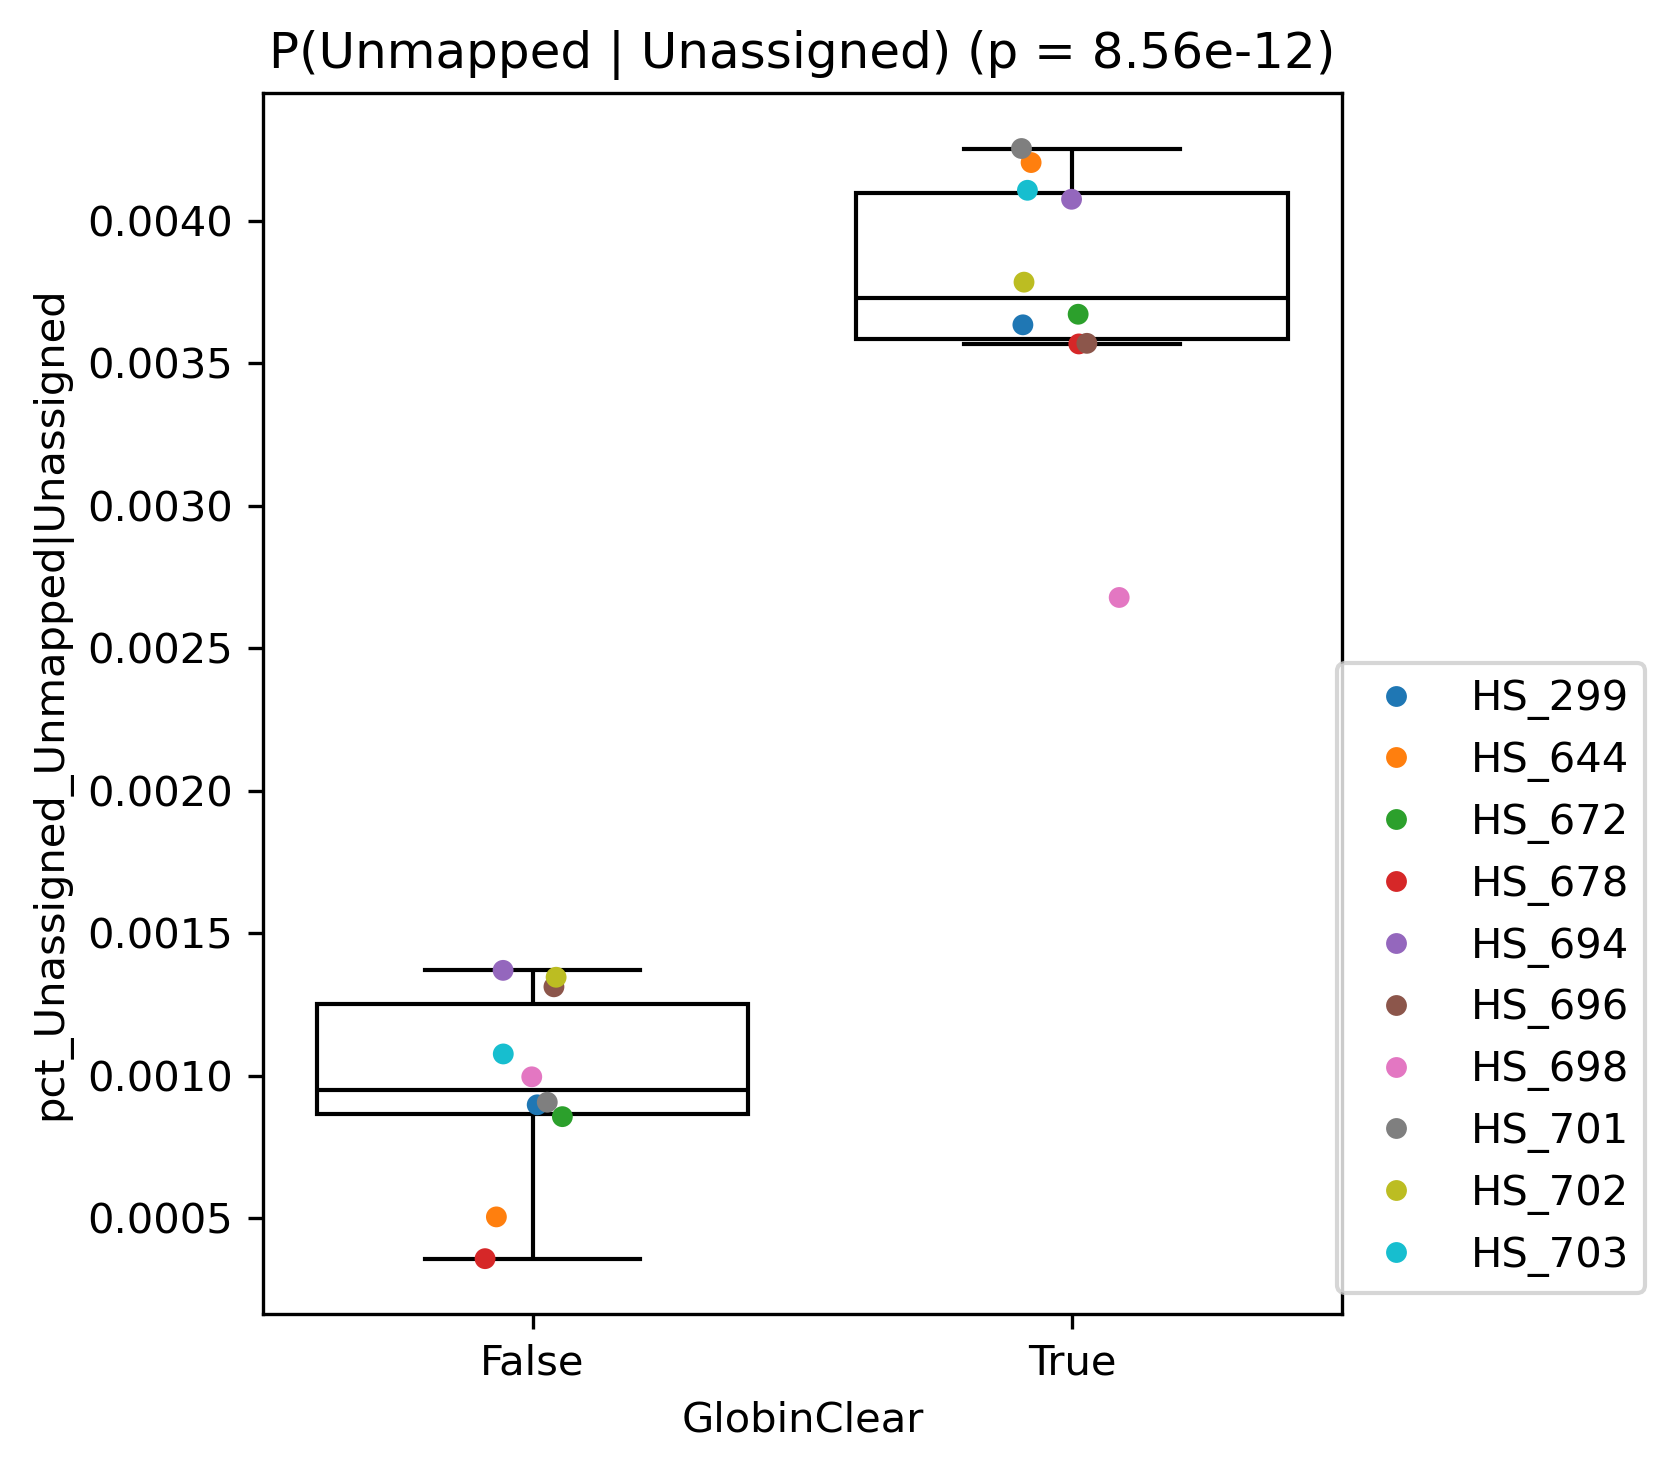

In [132]:
val = "pct_Unassigned_Unmapped|Unassigned"
title = "P(Unmapped | Unassigned)"

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)  # Set the figure size here

# Create the boxplot
sns.boxplot(x='GlobinClear', y=val, data=merged, ax=ax, color = "white", linecolor = "black", showfliers=False)
sns.stripplot(x='GlobinClear', y=val, data=merged, ax=ax, hue='sample_name')

plt.legend(loc="lower right", bbox_to_anchor=(1.3, 0))

# Perform t-test (or any other test) between the two groups
group_A = merged[merged['GlobinClear']][val]
group_B = merged[~merged['GlobinClear']][val]
t_stat, p_val = ttest_ind(group_A, group_B)

# Set the title for the entire figure, not as an attribute of fig
ax.set_title(f'{title} (p = {p_val:.2e})')
plt.tight_layout()
fig.savefig("prior_" + val.split('|')[0] + '.png')